<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/deep_iris2_multiclass_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificação Multiclasse com Iris e TF 2.0

Parte 1: montando e calibrando o modelo

In [0]:
!pip install tensorflow-gpu==2.0.0 #com GPU

     |████████████████████████████████| 380.8MB 36kB/s 
     |████████████████████████████████| 3.8MB 43.3MB/s 
     |████████████████████████████████| 450kB 49.8MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0


In [0]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
y = iris.target
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
y.shape

(150,)

In [0]:
# y é (150,)...mude para(150,1)
y=y.reshape((150,1))

In [0]:
y = onehot.fit_transform(y).toarray()
y[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [0]:
#crie o modelo com duas hidden layers de 4 perceptrons, relu e 3 outputs
#com softmax 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, activation='relu',input_shape=(4,)))
model.add(tf.keras.layers.Dense(2, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test),epochs=300)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 2s 17ms/sample - loss: 2.1541 - accuracy: 0.2857 - val_loss: 1.5984 - val_accuracy: 0.4444
Epoch 2/300
105/105 [==============================] - 0s 351us/sample - loss: 2.0702 - accuracy: 0.2857 - val_loss: 1.5410 - val_accuracy: 0.4444
Epoch 3/300
105/105 [==============================] - 0s 268us/sample - loss: 1.9918 - accuracy: 0.2857 - val_loss: 1.4856 - val_accuracy: 0.4444
Epoch 4/300
105/105 [==============================] - 0s 248us/sample - loss: 1.9171 - accuracy: 0.2857 - val_loss: 1.4324 - val_accuracy: 0.4444
Epoch 5/300
105/105 [==============================] - 0s 285us/sample - loss: 1.8422 - accuracy: 0.2857 - val_loss: 1.3826 - val_accuracy: 0.4444
Epoch 6/300
105/105 [==============================] - 0s 273us/sample - loss: 1.7740 - accuracy: 0.2857 - val_loss: 1.3355 - val_accuracy: 0.4444
Epoch 7/300
105/105 [==============================] - 0s 256us/sample - l

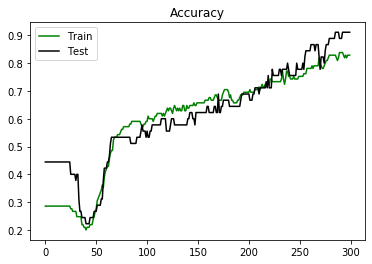

In [0]:
import matplotlib.pyplot as plt
plt.title('Accuracy')
plt.plot(hist.history['accuracy'],color='green')
plt.plot(hist.history['val_accuracy'],color='black')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

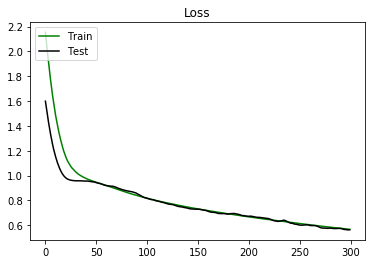

In [0]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(hist.history['loss'],color='green')
plt.plot(hist.history['val_loss'],color='black')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.predict(X[:1])

array([[0.652969 , 0.2140051, 0.1330259]], dtype=float32)

Parte 2: montando o modelo com base nos pesos

Usaremos a função ativadora RELU

In [0]:
def relu(x):
  if x<=0:return 0.0
  else: return x

Perceptron

In [0]:
def perceptron(inp,w,b,f):
  return f(np.inner(inp,w)+b)

In [0]:
model.get_weights()

[array([[ 0.46019593, -0.77743536],
        [-0.9362714 ,  0.5621408 ],
        [ 0.34664682,  1.1545835 ],
        [-0.15891035,  0.790548  ]], dtype=float32),
 array([-0.31881723, -0.07698157], dtype=float32),
 array([[ 0.5906803 ,  1.0090822 ],
        [-0.00545696,  1.6309538 ]], dtype=float32),
 array([-0.38254857, -0.3704896 ], dtype=float32),
 array([[-0.1791789 , -0.40423286,  0.49170467],
        [-1.229505  , -0.33195883, -0.298226  ]], dtype=float32),
 array([ 0.9382546 , -0.17727524, -0.6527312 ], dtype=float32)]

In [0]:
list_w=model.get_weights()
w1=list_w[0]
w1

array([[ 0.46019593, -0.77743536],
       [-0.9362714 ,  0.5621408 ],
       [ 0.34664682,  1.1545835 ],
       [-0.15891035,  0.790548  ]], dtype=float32)

In [0]:
b1=list_w[1]

In [0]:
inpt=np.array([5.1,3.5,1.4,0.2])
out11=perceptron(inpt,w1[:,0],b1[0],relu)
out21=perceptron(inpt,w1[:,1],b1[1],relu)
out11,out21

(-0.7952445209026338, -0.2998826026916501)

In [0]:
w2=list_w[2]
b2=list_w[3]
out1=np.array([out11,out21])
out12=perceptron(out1,w2[:,0],b2[0],relu)
out22=perceptron(out1,w2[:,1],b2[1],relu)
out12,out22

(0.0, 0.0)

In [0]:
w3=list_w[4]
b3=list_w[5]
out2=np.array([out12,out22])
out13=perceptron(out2,w3[:,0],b3[0],lambda x:x)
out23=perceptron(out2,w3[:,1],b3[1],lambda x:x)
out33=perceptron(out2,w3[:,2],b3[2],lambda x:x)
out13,out23,out33
out3=np.array([out13,out23,out33])
out3

array([ 0.93825459, -0.17727524, -0.65273118])

In [0]:
import math
def softmax(v):
  le=[math.exp(i) for i in v]
  soma=sum(le)
  le=[v/soma for v in le]
  return le

In [0]:
softmax(out3)

[0.6529690008031664, 0.214005094530291, 0.13302590466654263]

In [0]:
def layer(inp,w1,b1,f):
  v=np.dot(w1.T,inp)+b1
  for i in range(len(v)):
    v[i]=f(v[i])
  return v

In [0]:
softmax(layer(layer(layer(np.array([5.1,3.5,1.4,0.2]),w1,b1,relu),w2,b2,relu),w3,b3,lambda x:x))

[0.6529690008031664, 0.214005094530291, 0.13302590466654263]